<a href="https://www.kaggle.com/code/ummmuawiyah/titanic-eda-and-multiple-models?scriptVersionId=113646999" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Here's a comparison of various models using the famous Titanic dataset.

# Introduction 

In [1]:
#import libraries

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)


In [2]:
#load dataset

titanic = pd.read_csv('/kaggle/input/titanic/train.csv')


In [3]:
titanic.head() #check first 5 rows of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape # check shape

(891, 12)

In [5]:
#Remove Passenger ID and Name columns as they are unique for each passenger. Also remove Ticket as it seems to be unique for most passengers.

titanic.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace=True)

In [6]:
titanic.shape

(891, 9)

In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
titanic.skew() #check skewness

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [10]:
titanic.isnull().sum() #find total number of null values for each column

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
#Remove Cabin column due to the high number of null values

titanic.drop(['Cabin'], axis=1, inplace=True)

In [12]:
titanic.nunique() #find unique values

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

# Target variable: Survived




In [13]:
#target variable

titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### Two thirds of the people listed in this dataset did not survive. The data is imbalanced as the number of people that did not survive are twice the amount that did survive.

### However, in this case (assuming that the test set also reflects the same issue), this appears to signal a historical reality: more people died, rather than survived, that day.

# Features

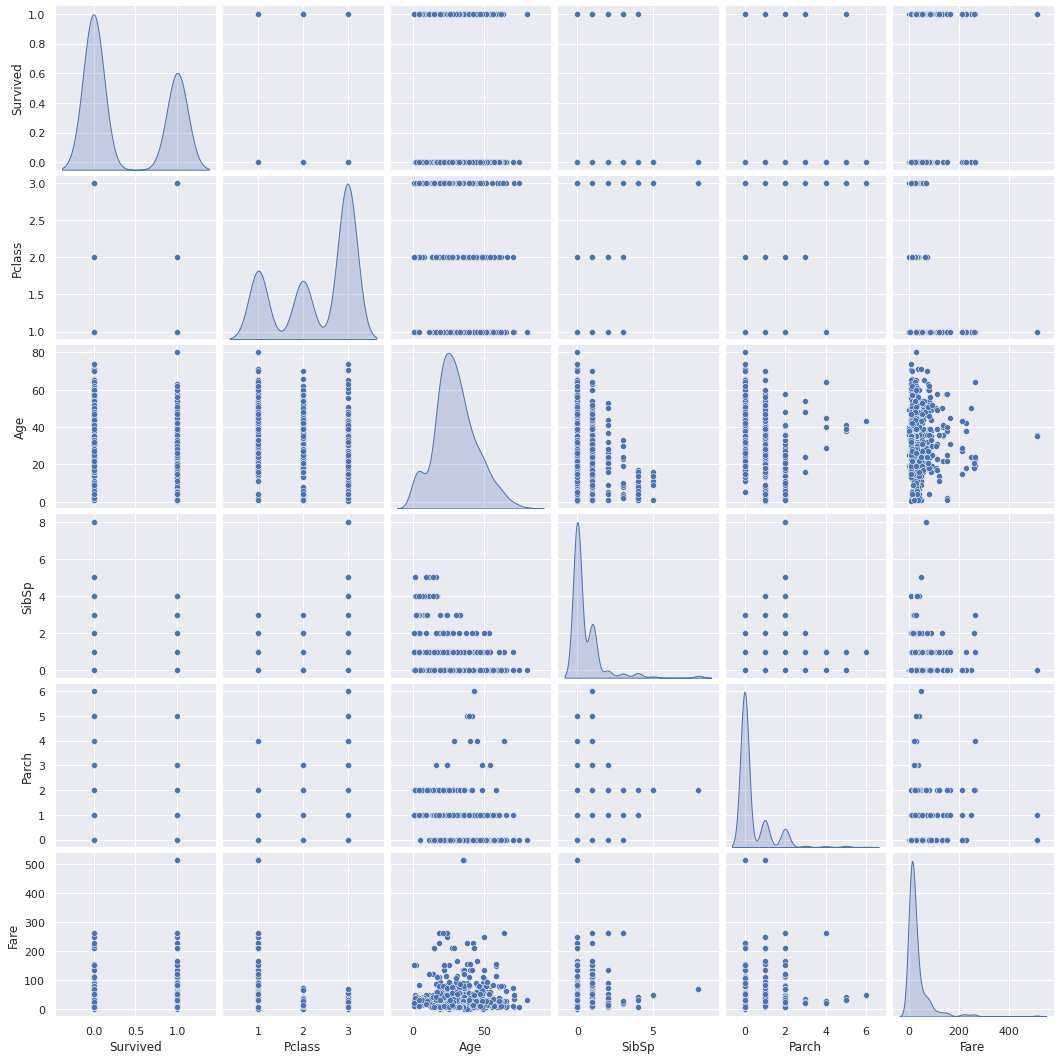

In [15]:
sns.pairplot(titanic,diag_kind='kde') # to check the correlation between various attributes
plt.show()

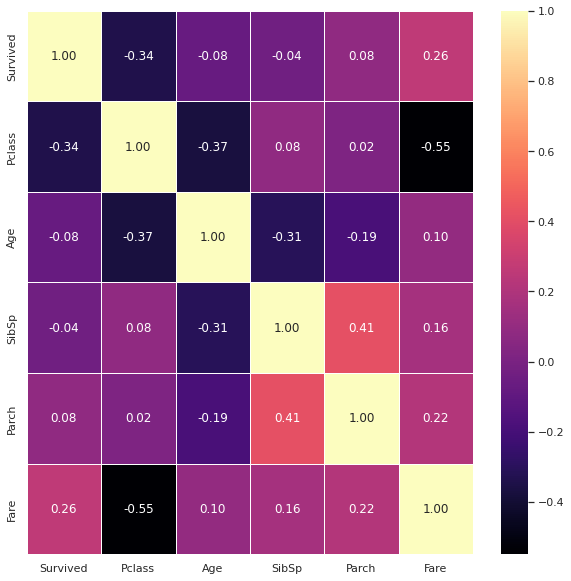

In [16]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(titanic.corr(), ax=ax, annot=True, linewidths=0.5, fmt= '.2f',cmap="magma")
plt.show()

## Let's take a look at the features.

In [17]:
# Ticket class

titanic['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

### It seems that there were more people in third class as opposed to the first and second classes.

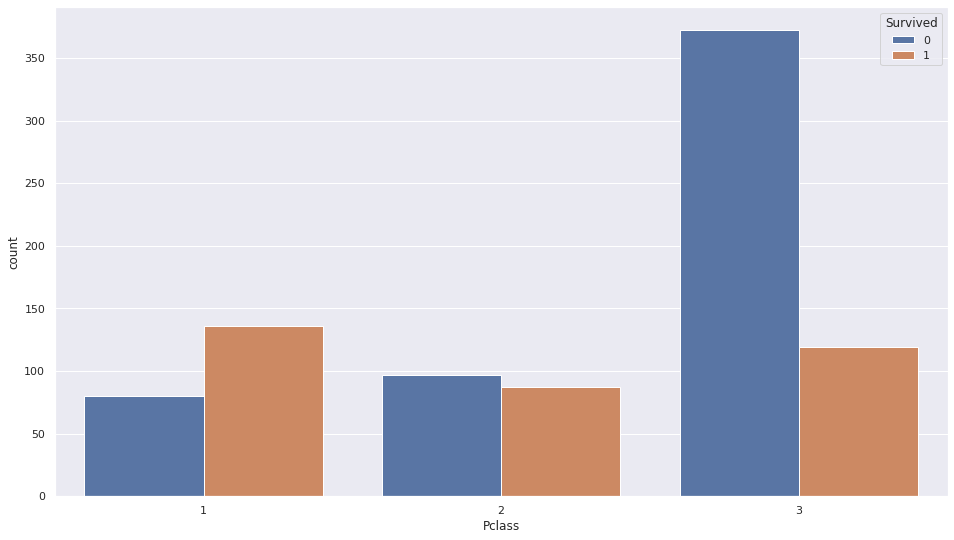

In [18]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Pclass'], hue=titanic['Survived'])
plt.show()


### This feature seems to be an important one as it shows us that those in the third class (the lowest one) were the least likely to survive. This makes sense as the people in the better classes were probably given the opportunity to leave the ship first.

In [19]:
# Gender 

titanic['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

### There were twice as many men on onboard the ship compared to women.

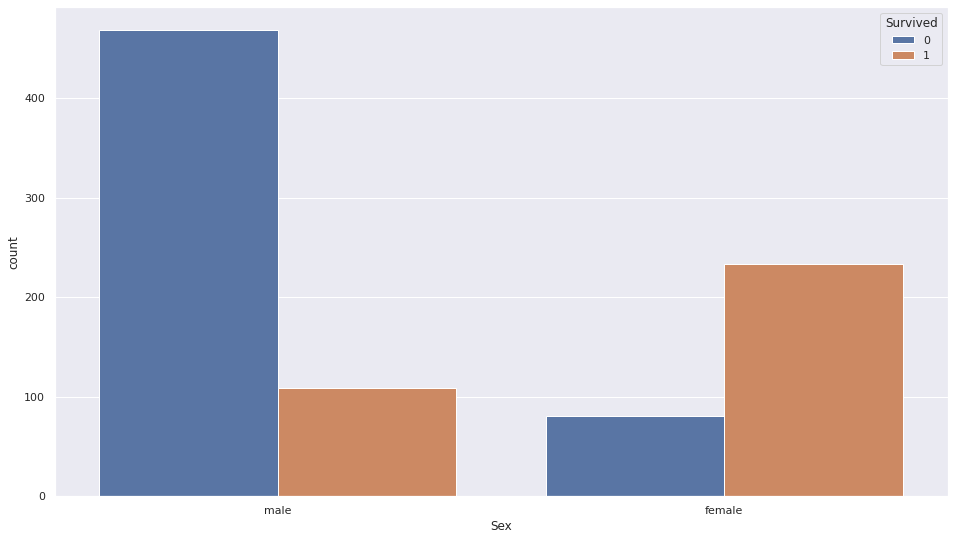

In [20]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Sex'], hue=titanic['Survived'])
plt.show()

### This feature also seems to be an important one as it shows us that males were less likely to survive than females. This also makes sense from two perspectives.

### 1. The men would probably have let their wives, sisters, mothers, daughters, etc. leave first out of concern for them.

### 2. In those days, women would probably not have travelled alone or in the lower classes. The third class (the one where people were least likely to survive) probably had more men.

### Let's check the last assumption.

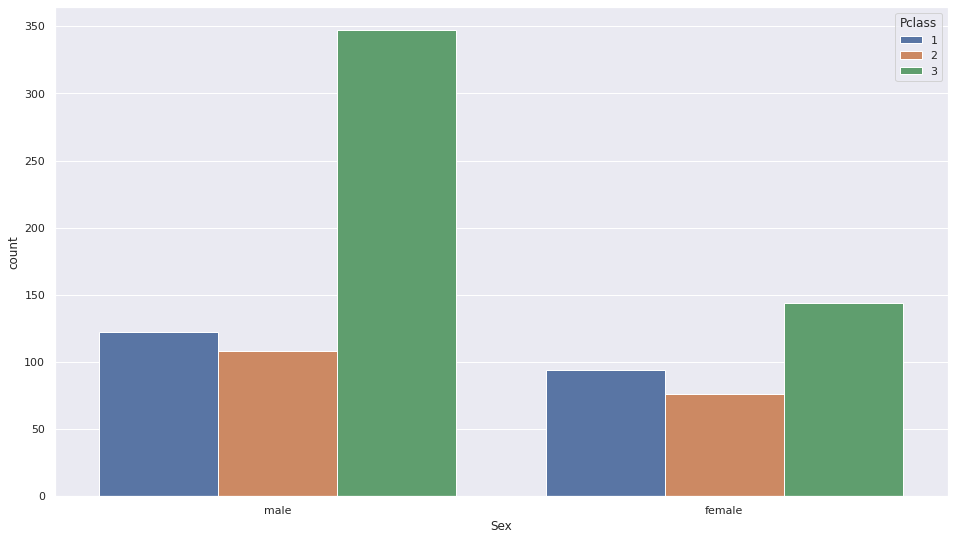

In [21]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Sex'], hue=titanic['Pclass'])
plt.show()

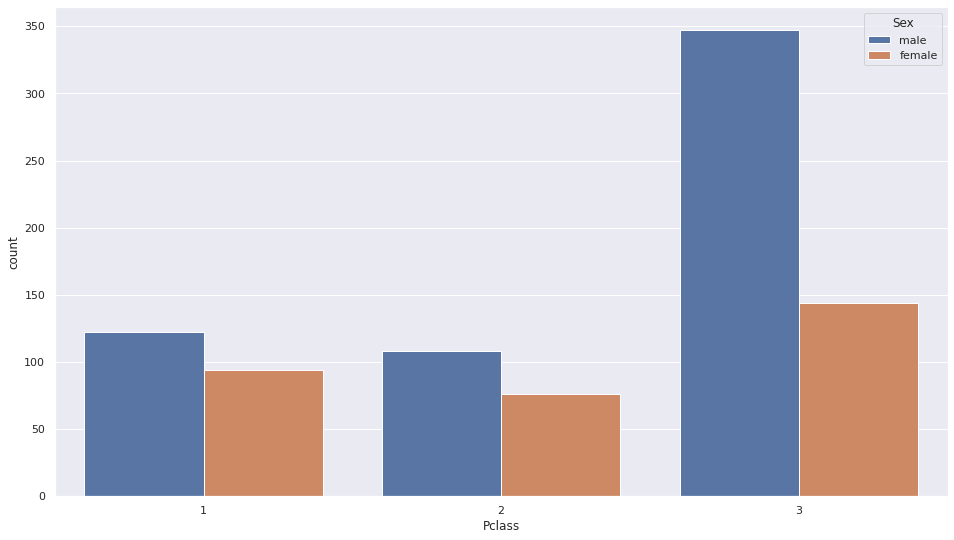

In [22]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Pclass'], hue=titanic['Sex'])
plt.show()

### The third class did indeed have far more men than women.

In [23]:
#number of spouses or siblings aboard

titanic['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

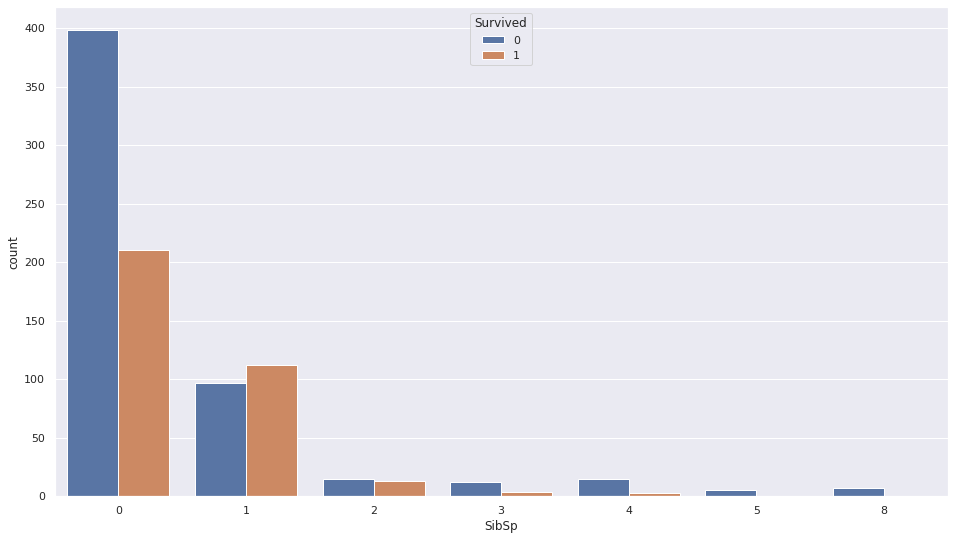

In [24]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['SibSp'], hue=titanic['Survived'])
plt.show()

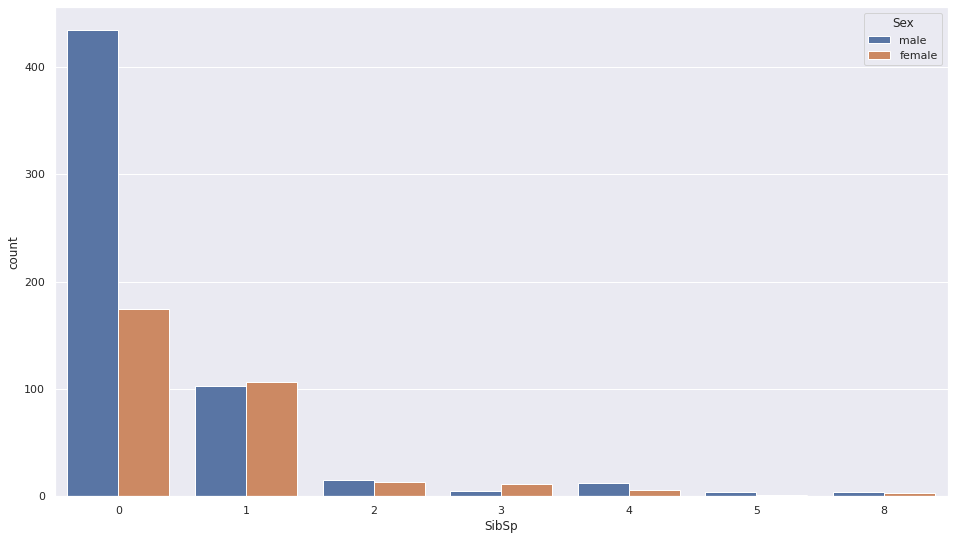

In [25]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['SibSp'], hue=titanic['Sex'])
plt.show()

In [26]:
#number of parents or children aboard

titanic['Parch'].value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

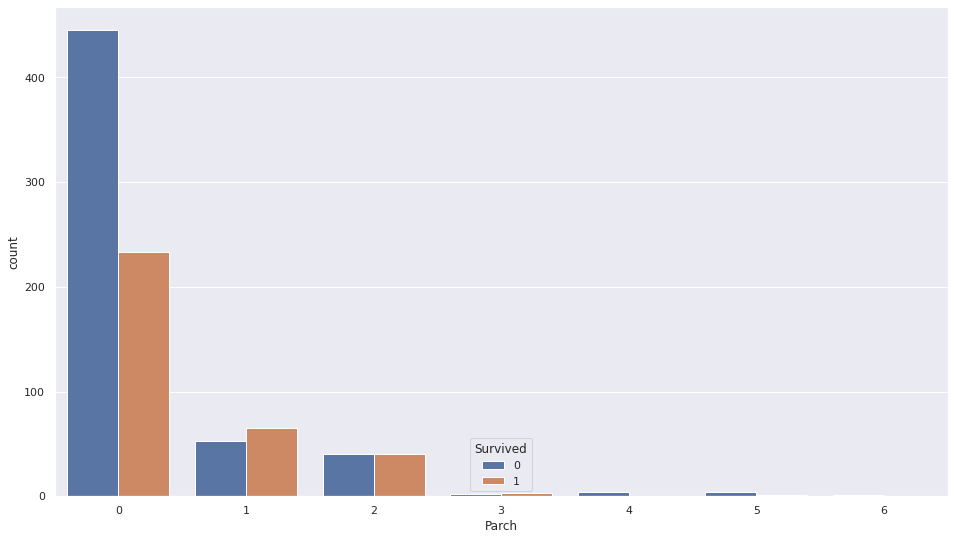

In [27]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Parch'], hue=titanic['Survived'])
plt.show()

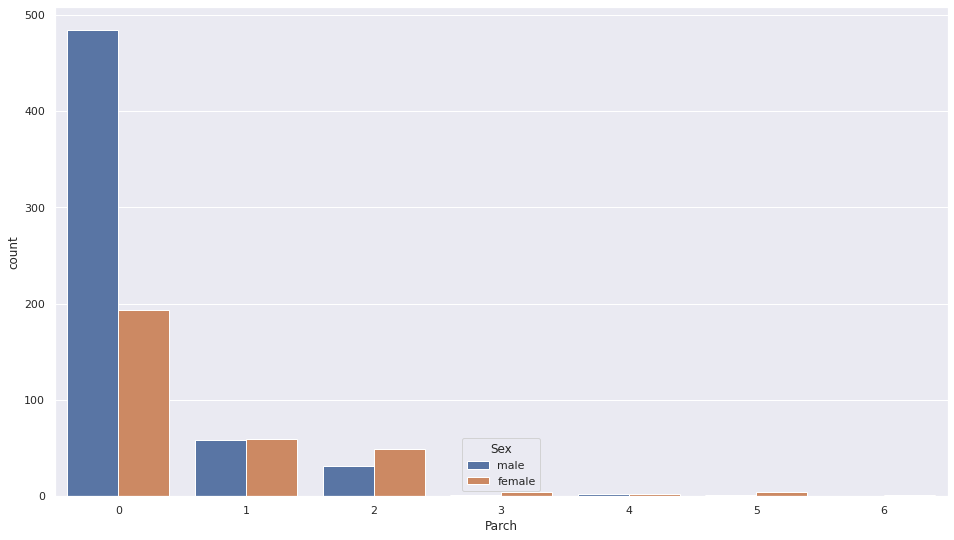

In [28]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Parch'], hue=titanic['Sex'])
plt.show()

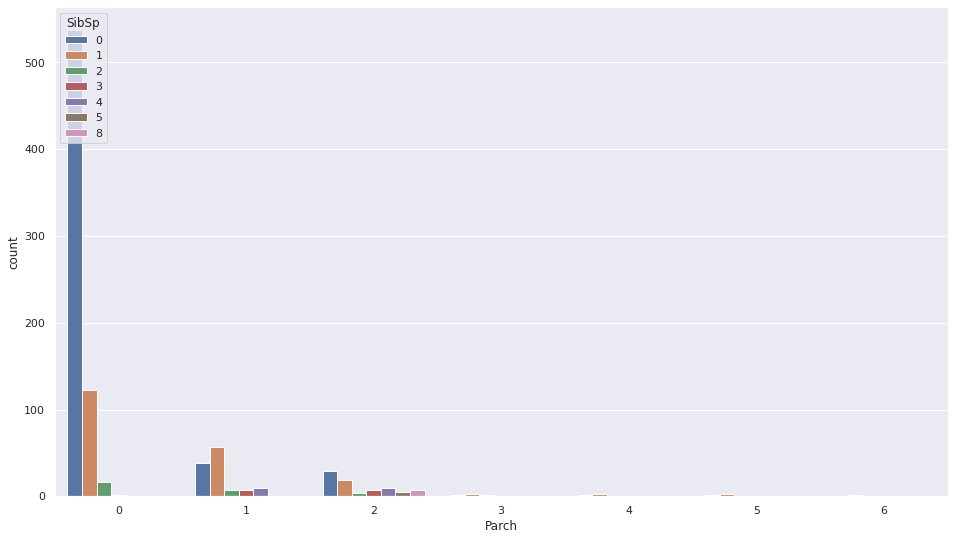

In [29]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Parch'], hue=titanic['SibSp'])
plt.show()

In [30]:
pd.crosstab(titanic['Parch'], titanic['SibSp'])

SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,537,123,16,2,0,0,0
1,38,57,7,7,9,0,0
2,29,19,4,7,9,5,7
3,1,3,1,0,0,0,0
4,1,3,0,0,0,0,0
5,2,3,0,0,0,0,0
6,0,1,0,0,0,0,0


### It seems some people had both parents/children and siblings/spouses.

### It also appears as though having zero family members could have decreased one's chance of surviving. Perhaps this was because families were given a chance to leave first, or as mentioned earlier, women may have been given preference and they did not seem to be travelling alone.

In [31]:
titanic['Embarked'].isnull().sum()

2

In [32]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
titanic['Embarked'].fillna("S",inplace=True) # code taken from someone's work

In [34]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

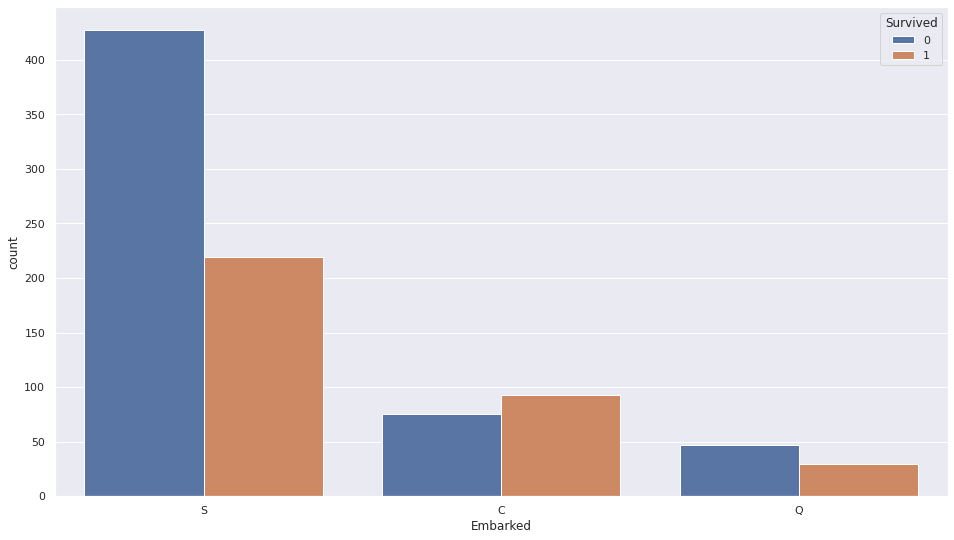

In [35]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Embarked'], hue=titanic['Survived'])
plt.show()

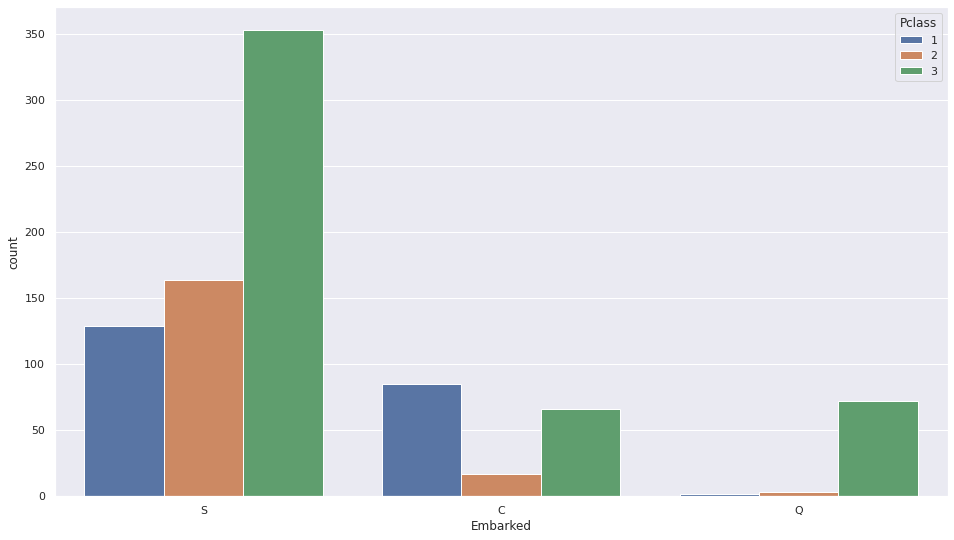

In [36]:
plt.figure(figsize=(16,9))
sns.countplot(x=titanic['Embarked'], hue=titanic['Pclass'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

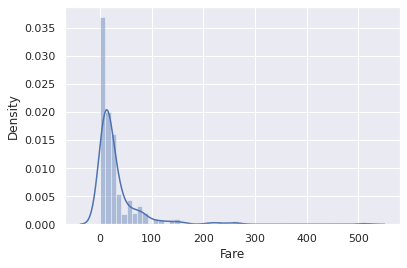

In [37]:
sns.distplot(titanic['Fare']) # analysis of the Fare column

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


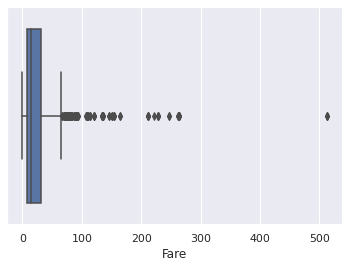

In [38]:
sns.boxplot(titanic['Fare'])
plt.show()

### The Fare column is extremely right skewed

In [39]:
#normalise Fare column
titanic['Fare']=np.log(titanic['Fare']+1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

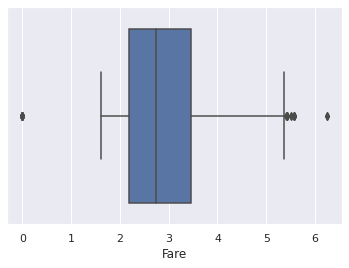

In [40]:
sns.boxplot(titanic['Fare'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

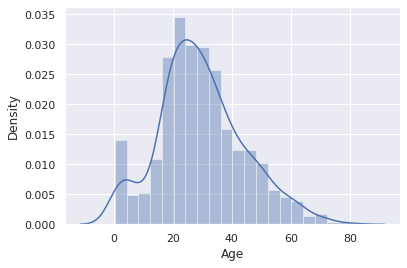

In [41]:
sns.distplot(titanic['Age']) # analysis of the Age column

In [42]:
titanic['Age'].mean()

29.69911764705882

In [43]:
titanic['Age'].min()

0.42

In [44]:
titanic['Age'].max()

80.0

In [45]:
titanic.groupby('Sex')['Age'].mean() # code taken from someone else

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [46]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True) # code taken from someone else

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

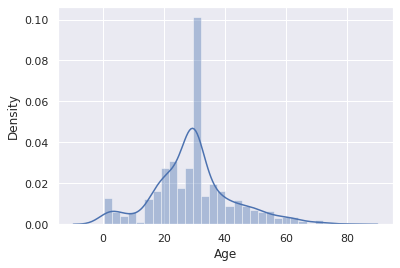

In [47]:
sns.distplot(titanic['Age'])

In [48]:
titanic=pd.get_dummies(titanic, drop_first=True)

In [49]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,2.110213,1,0,1
1,1,1,38.0,1,0,4.280593,0,0,0
2,1,3,26.0,0,0,2.188856,0,0,1
3,1,1,35.0,1,0,3.990834,0,0,1
4,0,3,35.0,0,0,2.202765,1,0,1


In [50]:
x = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [51]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,2.110213,1,0,1
1,1,38.0,1,0,4.280593,0,0,0
2,3,26.0,0,0,2.188856,0,0,1
3,1,35.0,1,0,3.990834,0,0,1
4,3,35.0,0,0,2.202765,1,0,1


In [52]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=1)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler().fit(x_train)

In [57]:
x_train=scaler.transform(x_train)

In [58]:
x_test=scaler.transform(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logreg = LogisticRegression(random_state=1, penalty='l2')
logreg.fit(x_train, y_train)


LogisticRegression(random_state=1)

In [62]:
y_predict=logreg.predict(x_test)

In [63]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', annot_kws={"size": 16}, xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.8073836276083467

Testing accuracy 0.7798507462686567

Confusion Matrix


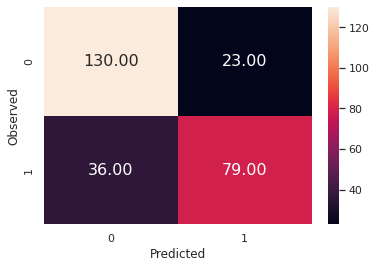

None

Recall: 0.6869565217391305

Precision: 0.7745098039215687

F1 Score: 0.7281105990783411

Roc Auc Score: 0.7683148621767548


In [64]:
print("Training accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Decision Tree : Entropy

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
# Build decision tree model

dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

In [67]:
print(dTree.score(x_train, y_train)) # performance on training data
print(dTree.score(x_test, y_test)) # performance on testing data


0.898876404494382
0.7761194029850746


# Decision Tree: Gini

In [68]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9052969502407705
0.7910447761194029


# Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier

In [70]:
bgc = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgc = bgc.fit(x_train,y_train)

Training accuracy 0.9165329052969502

Testing accuracy 0.7873134328358209

Confusion Matrix


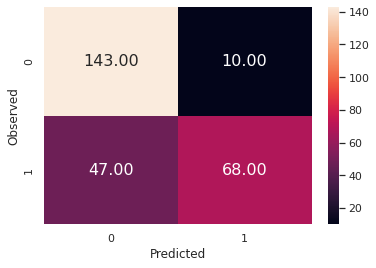

None

Recall: 0.591304347826087

Precision: 0.8717948717948718

F1 Score: 0.7046632124352331

Roc Auc Score: 0.762972435350952


In [71]:
y_predict = bgc.predict(x_test)


print("Training accuracy",bgc.score(x_train,y_train))  
print()
print("Testing accuracy",bgc.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# AdaBoosting

In [72]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(n_estimators=10, random_state=42)
adab = adab.fit(x_train, y_train)

In [73]:
y_predict = adab.predict(x_test)

Training accuracy 0.8394863563402889

Testing accuracy 0.7649253731343284

Confusion Matrix


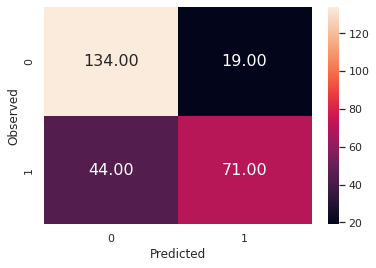

None

Recall: 0.6173913043478261

Precision: 0.7888888888888889

F1 Score: 0.6926829268292684

Roc Auc Score: 0.7466041489059392


In [74]:
print("Training accuracy",adab.score(x_train,y_train))  
print()
print("Testing accuracy",adab.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# GradientBoost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=42)
gbcl = gbcl.fit(x_train, y_train)

In [76]:
y_predict = gbcl.predict(x_test)

Training accuracy 0.8924558587479936

Testing accuracy 0.7873134328358209

Confusion Matrix


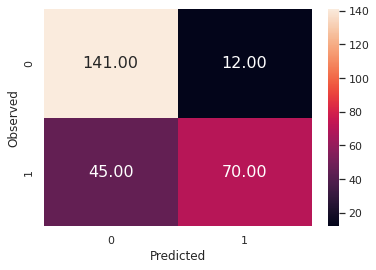

None

Recall: 0.6086956521739131

Precision: 0.8536585365853658

F1 Score: 0.7106598984771574

Roc Auc Score: 0.7651321398124469


In [77]:
print("Training accuracy",gbcl.score(x_train,y_train))  
print()
print("Testing accuracy",gbcl.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# LightGBM

In [78]:
from lightgbm import LGBMClassifier


In [79]:
lgb = LGBMClassifier()
lgb = lgb.fit(x_train, y_train)

y_predict = lgb.predict(x_test)

Training accuracy 0.956661316211878

Testing accuracy 0.753731343283582

Confusion Matrix


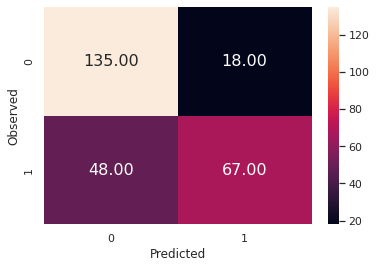

None

Recall: 0.5826086956521739

Precision: 0.788235294117647

F1 Score: 0.6699999999999999

Roc Auc Score: 0.7324808184143221


In [80]:
print("Training accuracy",lgb.score(x_train,y_train))  
print()
print("Testing accuracy",lgb.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# CatBoost

In [81]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [82]:
from catboost import CatBoostClassifier

In [83]:
cat = CatBoostClassifier()
cat = cat.fit(x_train, y_train)

y_predict = cat.predict(x_test)

Learning rate set to 0.008417
0:	learn: 0.6865253	total: 59.2ms	remaining: 59.2s
1:	learn: 0.6808878	total: 60.5ms	remaining: 30.2s
2:	learn: 0.6741395	total: 61.5ms	remaining: 20.4s
3:	learn: 0.6682755	total: 62.4ms	remaining: 15.5s
4:	learn: 0.6623647	total: 63.1ms	remaining: 12.6s
5:	learn: 0.6566969	total: 64ms	remaining: 10.6s
6:	learn: 0.6508177	total: 64.9ms	remaining: 9.21s
7:	learn: 0.6471113	total: 65.4ms	remaining: 8.11s
8:	learn: 0.6410335	total: 66.3ms	remaining: 7.3s
9:	learn: 0.6363091	total: 67.2ms	remaining: 6.65s
10:	learn: 0.6316527	total: 68.1ms	remaining: 6.12s
11:	learn: 0.6268367	total: 69ms	remaining: 5.68s
12:	learn: 0.6215187	total: 69.9ms	remaining: 5.3s
13:	learn: 0.6166529	total: 70.7ms	remaining: 4.98s
14:	learn: 0.6136939	total: 71.2ms	remaining: 4.68s
15:	learn: 0.6098491	total: 72ms	remaining: 4.43s
16:	learn: 0.6056575	total: 72.9ms	remaining: 4.21s
17:	learn: 0.6016304	total: 73.8ms	remaining: 4.03s
18:	learn: 0.5979478	total: 74.3ms	remaining: 3.83s


Training accuracy 0.9052969502407705

Testing accuracy 0.7835820895522388

Confusion Matrix


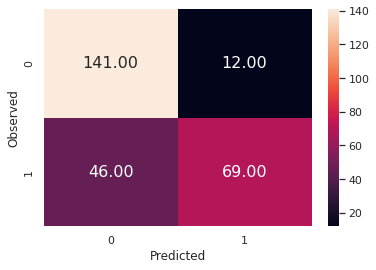

None

Recall: 0.6

Precision: 0.8518518518518519

F1 Score: 0.7040816326530612

Roc Auc Score: 0.7607843137254903


In [84]:
print("Training accuracy",cat.score(x_train,y_train))  
print()
print("Testing accuracy",cat.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Ensemble Technique - RandomForest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=42,max_features=7)
rfcl = rfcl.fit(x_train, y_train)

In [86]:
y_predict = rfcl.predict(x_test)

Training accuracy 0.9871589085072231

Testing accuracy 0.7910447761194029

Confusion Matrix


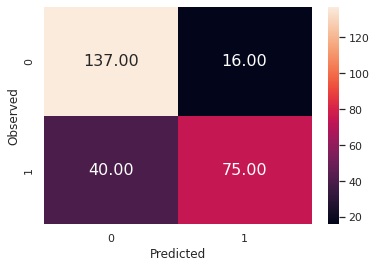

None

Recall: 0.6521739130434783

Precision: 0.8241758241758241

F1 Score: 0.7281553398058253

Roc Auc Score: 0.7737993748223928


In [87]:
print("Training accuracy",rfcl.score(x_train,y_train))  
print()
print("Testing accuracy",rfcl.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# XGBoost

In [88]:
from xgboost import XGBClassifier

In [89]:
xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train) # check
y_predict = xgb.predict(x_test)

Training accuracy 0.9775280898876404

Testing accuracy 0.746268656716418

Confusion Matrix


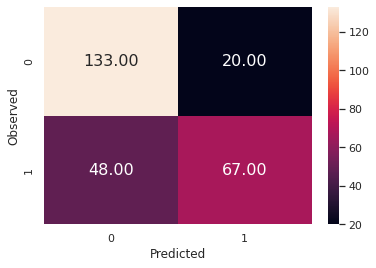

None

Recall: 0.5826086956521739

Precision: 0.7701149425287356

F1 Score: 0.6633663366336633

Roc Auc Score: 0.7259448707019039


In [90]:
print("Training accuracy",xgb.score(x_train,y_train))  
print()
print("Testing accuracy",xgb.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Naive Bayes


## Bernoulli

In [91]:
from sklearn.naive_bayes import BernoulliNB

bern = BernoulliNB()
bern = bern.fit(x_train, y_train)
y_predict = bern.predict(x_test)

Training accuracy 0.7688603531300161

Testing accuracy 0.7126865671641791

Confusion Matrix


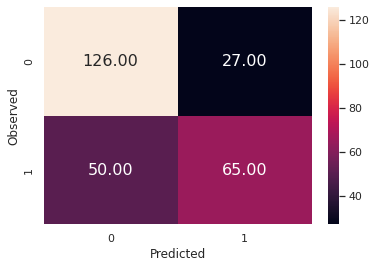

None

Recall: 0.5652173913043478

Precision: 0.7065217391304348

F1 Score: 0.6280193236714975

Roc Auc Score: 0.6943734015345268


In [92]:
print("Training accuracy",bern.score(x_train,y_train))  
print()
print("Testing accuracy",bern.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## Gaussian

In [93]:
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
gaus = gaus.fit(x_train, y_train)
y_predict = gaus.predict(x_test)

Training accuracy 0.7849117174959872

Testing accuracy 0.7388059701492538

Confusion Matrix


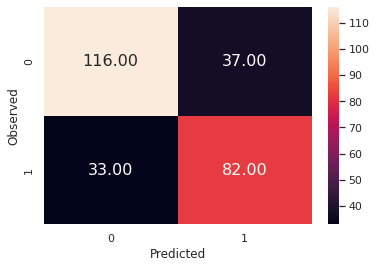

None

Recall: 0.7130434782608696

Precision: 0.6890756302521008

F1 Score: 0.7008547008547008

Roc Auc Score: 0.7356067064506961


In [94]:
print("Training accuracy",gaus.score(x_train,y_train))  
print()
print("Testing accuracy",gaus.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# K Nearest Neighbours

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [96]:
knn = knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

Training accuracy 0.8667736757624398

Testing accuracy 0.7611940298507462

Confusion Matrix


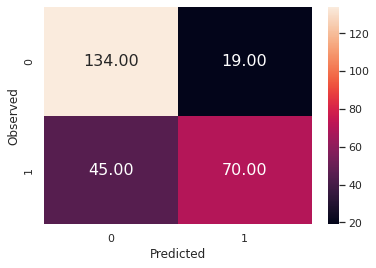

None

Recall: 0.6086956521739131

Precision: 0.7865168539325843

F1 Score: 0.6862745098039216

Roc Auc Score: 0.7422563228189827


In [97]:
print("Training accuracy",knn.score(x_train,y_train))  
print()
print("Testing accuracy",knn.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Support Vector Classifier

In [98]:
from sklearn.svm import SVC

supp=SVC()
supp = supp.fit(x_train, y_train)
y_predict = supp.predict(x_test)

Training accuracy 0.8683788121990369

Testing accuracy 0.7798507462686567

Confusion Matrix


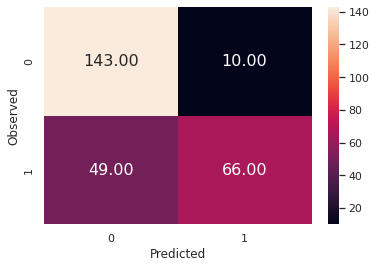

None

Recall: 0.5739130434782609

Precision: 0.868421052631579

F1 Score: 0.6910994764397906

Roc Auc Score: 0.754276783177039


In [99]:
print("Training accuracy",supp.score(x_train,y_train))  
print()
print("Testing accuracy",supp.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Conclusion 

### The titanic dataset performs reasonably well across all models. More analysis is needed to find out the best model for it.